In [14]:
%matplotlib inline
from scipy.stats import sem
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns


In [2]:
#home value data
HV_file="County_MedianValuePerSqft_AllHo.csv"
home_val_df = pd.read_csv(HV_file)
home_val_df=home_val_df.sort_values("MedianValuePerSqft",ascending = False) 

In [3]:
#census data 
census_df=pd.read_csv("Resources/census_data.csv")                              #read in csv
county=[census_df["County"][x].split()[0] for x in range(5)]           #cut name to just county
census_df["County"]=county                                   

In [4]:
pop_df=census_df.iloc[:,1:3]                   #cut to just county and population
merge_df=pd.merge(home_val_df,pop_df,how='outer',on="County")
merge_df

,Year,County,MedianValuePerSqft,Population
0,2010,Hennepin,150,1136522.0
1,2010,Ramsey,122,503113.0
2,2010,Itasca,95,44835.0
3,2010,Stearns,87,147927.0
4,2010,Steele,77,36434.0


In [5]:
def myplot(plot_df,compare_val,big_title,x_title,left_y_title,right_y_title,outfile):
    '''
          plot home-value(bar graph) with compare_val (line plot) against county
          
          The parameters plot_df : the dataframe with columns 'MedianValuePerSqft', 'County' and compare_val 
          compare_val the other column for graphing as a line plot
          big_title main graph title
          x_title  title for the x axis
          left_y_title, right_y_title the titles for the left and right y axis
          outfile the directory and file name for the graph output file
          
    '''
    width=.3
    fig,ax1=plt.subplots(figsize=(7,7))
    ax2=ax1.twinx()
    fig.suptitle(big_title,fontsize=16,fontweight='bold')

    plot_df["MedianValuePerSqft"].plot(kind='bar', width = width,color='blue',ax=ax1,edgecolor='black')
    plot_df[compare_val].plot(kind='line',secondary_y=True,color='red')
                                                          #set shared values
    x_axis=np.arange(0,len(home_val_df["County"]))
    ax1.set_xticks(x_axis)
    ax1.set_xticklabels(merge_df["County"],fontsize=12,rotation=0)
    ax1.set_xlim(-.5, len(home_val_df["County"])-0.5)

    ax1.set_facecolor('lightgrey')                           #background
    ax1.grid(color='white')

    plt.ylabel(right_y_title,color='red')                      #set y axis titles
    ax1.set_ylabel(left_y_title,color='blue',fontsize=12)
    # ax2.set_ylabel("Population",color='red',fontsize=12)
    #ax1.yaxis.tick_left()
    #ax2.yaxis.tick_right()

    plt.xlim([-width, len(plot_df["MedianValuePerSqft"])-width])
    plt.show()

    fig.savefig(outfile)               #Save the Figure

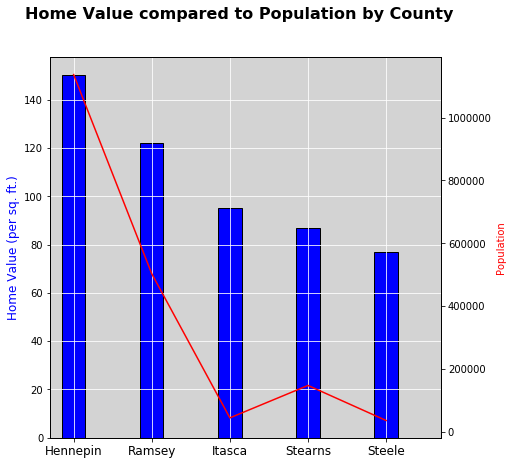

In [6]:
myplot(merge_df,"Population","Home Value compared to Population by County","County","Home Value (per sq. ft.)",
       "Population","Output/home_val_population.png")

In [7]:
poverty_data=census_df.iloc[:,1:8]                   #cut to county through poverty rate
poverty_data["Above Poverty"]=((poverty_data["Population"]-poverty_data["Poverty Count"]) /poverty_data["Population"])*100

In [8]:
merge2_df=pd.merge(home_val_df,poverty_data,how='outer',on="County")
merge2_df

,Year,County,MedianValuePerSqft,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,Above Poverty
0,2010,Hennepin,150,1136522.0,35.9,61328.0,35902.0,134363.0,11.822296,88.177704
1,2010,Ramsey,122,503113.0,34.7,51915.0,28956.0,77325.0,15.369311,84.630689
2,2010,Itasca,95,44835.0,44.5,45621.0,23465.0,5166.0,11.522248,88.477752
3,2010,Stearns,87,147927.0,33.1,51779.0,24816.0,17894.0,12.096507,87.903493
4,2010,Steele,77,36434.0,38.0,55321.0,25062.0,2717.0,7.457320,92.542680


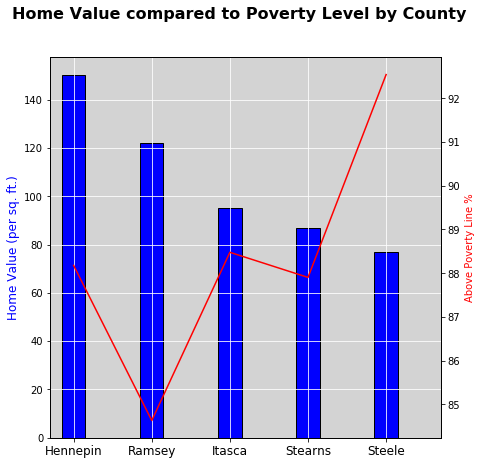

In [9]:
myplot(merge2_df,"Above Poverty","Home Value compared to Poverty Level by County","County","Home Value (per sq. ft.)",
       "Above Poverty Line %","Output/home_val_poverty.png")

In [12]:
#cut to just county and household income
income_df=census_df.iloc[:,1:5]                   
merge3_df=pd.merge(home_val_df,income_df,how='outer',on="County")
merge3_df

,Year,County,MedianValuePerSqft,Population,Median Age,Household Income
0,2010,Hennepin,150,1136522.0,35.9,61328.0
1,2010,Ramsey,122,503113.0,34.7,51915.0
2,2010,Itasca,95,44835.0,44.5,45621.0
3,2010,Stearns,87,147927.0,33.1,51779.0
4,2010,Steele,77,36434.0,38.0,55321.0


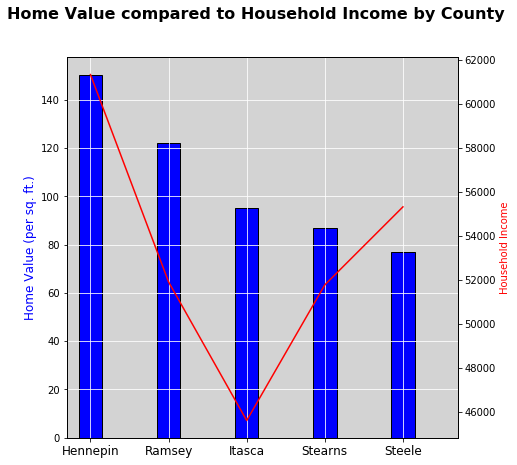

In [13]:
myplot(merge3_df,"Household Income","Home Value compared to Household Income by County","County","Home Value (per sq. ft.)",
       "Household Income","Output/Household_Income.png")

In [35]:
#cut to just county and household income
income_df=census_df.iloc[:,1:18]                   
merge4_df=pd.merge(home_val_df,income_df,how='outer',on="County")
merge4_df

,Year,County,MedianValuePerSqft,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,White,Black or African American,American Indian or Alaska Native,Asian,Hawaiian or Other Pacific Islander,Less Than High School,High School,Some College or Associate's Degree,Bachelor's Degree,Graduate or Professional Degree
0,2010,Hennepin,150,1136522.0,35.9,61328.0,35902.0,134363.0,11.822296,869704.0,130404.0,9343.0,68523.0,515.0,60019.0,151220.0,215800.0,223883.0,111801.0
1,2010,Ramsey,122,503113.0,34.7,51915.0,28956.0,77325.0,15.369311,365854.0,52512.0,3481.0,55933.0,220.0,32867.0,77123.0,88169.0,76600.0,49465.0
2,2010,Itasca,95,44835.0,44.5,45621.0,23465.0,5166.0,11.522248,42156.0,150.0,1394.0,174.0,0.0,2443.0,10824.0,11911.0,4660.0,1960.0
3,2010,Stearns,87,147927.0,33.1,51779.0,24816.0,17894.0,12.096507,137089.0,3847.0,424.0,2840.0,40.0,9065.0,27904.0,31373.0,14321.0,6804.0
4,2010,Steele,77,36434.0,38.0,55321.0,25062.0,2717.0,7.457320,34107.0,935.0,35.0,306.0,0.0,2554.0,8625.0,7694.0,3824.0,1505.0


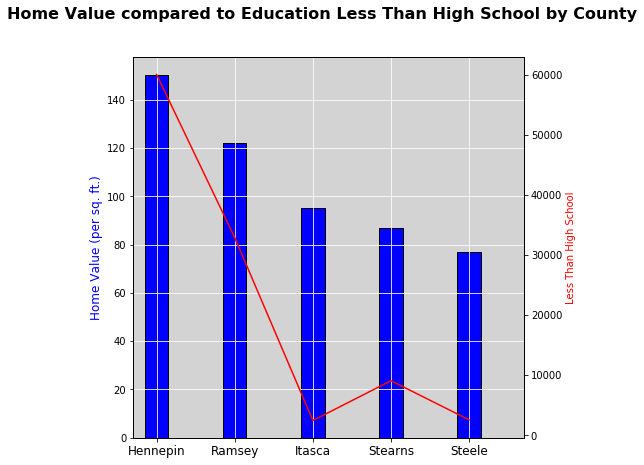

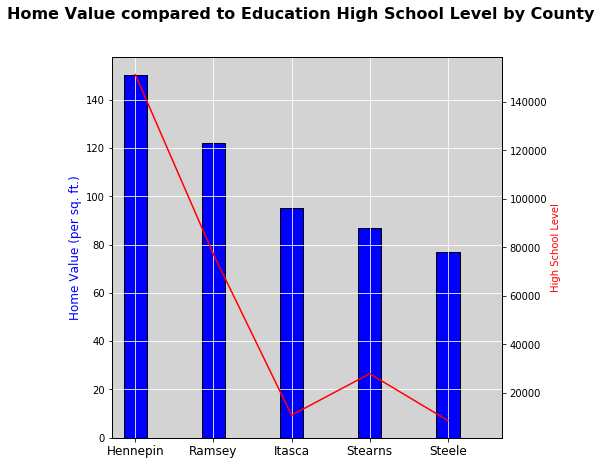

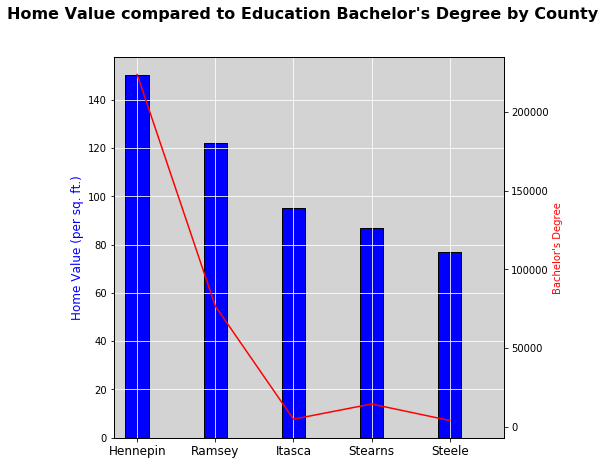

In [39]:
myplot(merge4_df,"Less Than High School","Home Value compared to Education Less Than High School by County","County","Home Value (per sq. ft.)",
       "Less Than High School","Output/Less Than High School.png")
myplot(merge4_df,"High School","Home Value compared to Education High School Level by County","County","Home Value (per sq. ft.)",
       "High School Level","Output/High School.png")
myplot(merge4_df,"Bachelor's Degree","Home Value compared to Education Bachelor's Degree by County","County","Home Value (per sq. ft.)",
       "Bachelor's Degree","Output/Bachelor's Degree.png")